# Random Forest benchmarks in R

In [1]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


## Load data

In [2]:
# load breast cancer data
raw_data <- read.delim("http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.dat", 
                       sep = ",", header = FALSE)

raw_data <- raw_data[, -1] # remove first column, its just an identifier
names(raw_data)[2:dim(raw_data)[2]] <- paste("x_", 0:29, sep="")
names(raw_data)[1] <- 'y'

head(raw_data)

N_obs <- dim(raw_data)[1]
N_features <- dim(raw_data)[2] - 1

cat('number of samples: ', N_obs, '\n')
cat('number of features: ', N_features, '\n')

# split data into training and testing

train_split_propn=0.9
training_index <- sample(N_obs, round(train_split_propn * N_obs), replace = FALSE)

data_train <- raw_data[training_index, ]
data_test <- raw_data[-training_index, ]

#print(head(data_train))
#print(dim(X_train))
#print(length(y_train))
#print(dim(X_test))
#print(length(y_test))

y,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,⋯,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29
M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


number of samples:  569 
number of features:  30 


## Random forest benchmarks

In [5]:
ntree <- 10

# fit random forest
t0 <- Sys.time()
rf <- randomForest(y ~ ., data = data_train, ntree = ntree)
t_rf <- Sys.time() - t0

# prediction accuracy 
score <- mean(predict(rf, data_test[,-1]) == data_test[,1])

cat('number of trees: ', ntree, '\n')
cat('time to fit rf: ', t_rf, '(seconds) \n')
cat('accuracy: ', score)

number of trees:  10 
time to fit rf:  0.3235152 (seconds) 
accuracy:  0.9824561

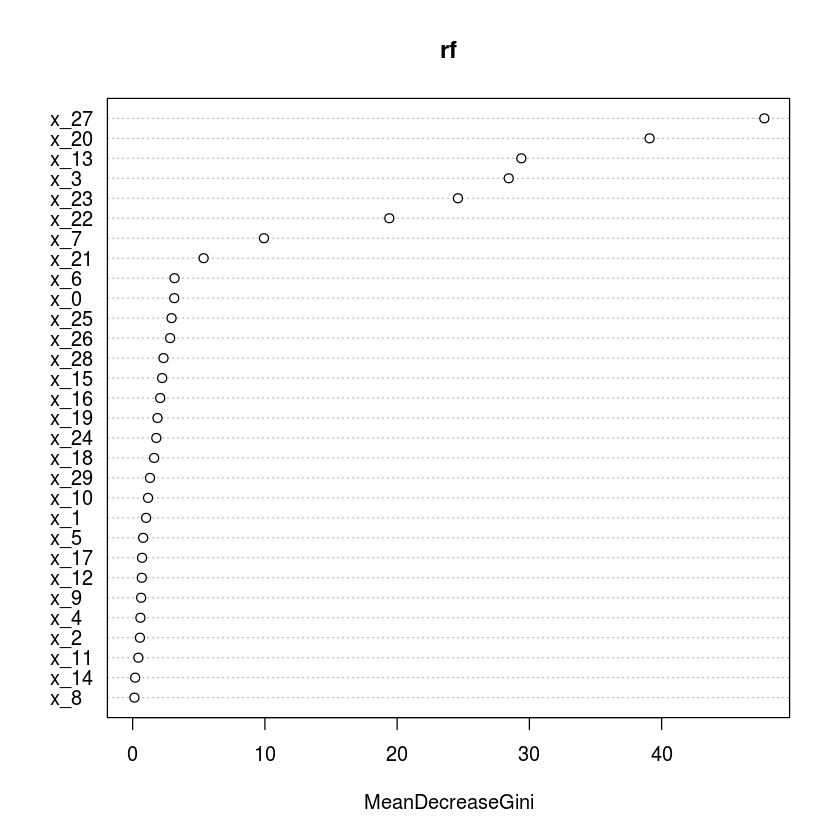

In [6]:
# importance(rf)
varImpPlot(rf)

# Explore Ranger

In [7]:
library(ranger)


Attaching package: ‘ranger’

The following object is masked from ‘package:randomForest’:

    importance



In [8]:
# Fit random forest using ranger
t0 <-Sys.time()
ranger_rf <- ranger(y ~ ., data = raw_data, num.trees = ntree, write.forest = TRUE, importance = "impurity")
t_ranger <- Sys.time() - t0

ranger_predict <- predict(ranger_rf, data_test[,-1])
score_ranger <- mean(ranger_predict$predictions == data_test[,1])

cat('number of trees: ', ntree, '\n')
cat('time to fit rf: ', t_ranger, '(seconds) \n')
cat('accuracy: ', score_ranger)

number of trees:  10 
time to fit rf:  0.02193689 (seconds) 
accuracy:  1

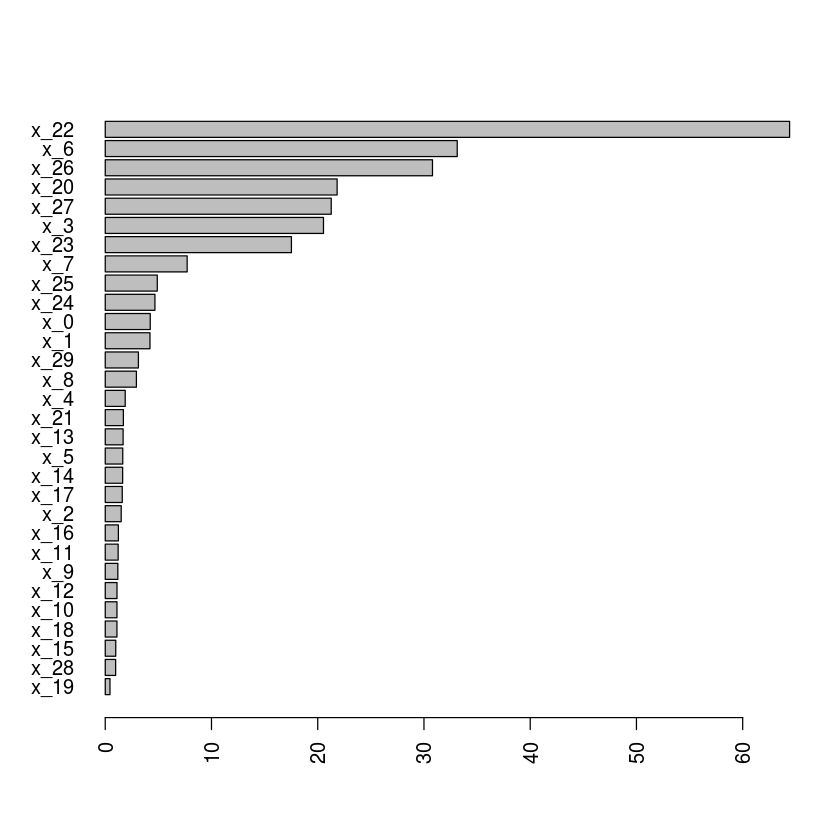

In [9]:
barplot(ranger_rf$variable.importance[order(ranger_rf$variable.importance)], horiz = TRUE, las=2)